### 한국에서 코로나 바이러스에 감염된 사람들 데이터셋 처리

 - 비교적 최신 데이터  

 - csv 파일 형식  
 
 - column 항목  
 
 > 0. id: 확진자 id  
 > 1. global_num: n번째 확진자  
 > 2. sex: 성별  
 > 3. birth_year: 출생 연도  
 > 4. age: 나이  
 > 5. country: 국적  
 > 6. province: 방문지  
 > 7. city: 발생 도시  
 > 8. disease: 기저 질환  
 > 9. infection_case: 감염 종류  
 > 10. infection_order: 감염 차수 (n차 감염)  
 > 11. infected_by: 해당 확진자의 감염원 id  
 > 12. contact_number: 접촉자 수  
 > 13. symptom_onset_date: 증상 발현일  
 > 14. confirmed_date: 확진 일자  
 > 15. released_date: 퇴원 일자 (격리 해제 일자)
 > 16. deceased_date: 사망 일자
 > 17. state: 상태

In [3]:
# draw charts
%matplotlib notebook

from matplotlib import pyplot as plt
import numpy as np

In [6]:
# CSV 파일 읽어들이기

import csv  # csv 모듈 임포트
import pprint

# 파일 위치, 경로 정의
file_path = 'data/PatientInfo.csv'

# patient.csv 파일 열기
with open(file_path) as file:
    reader = csv.reader(file)  # CSV 파일을 읽어들이는 읽기 객체
    raw = list(reader)      #  CSV 파일 내용을 리스트로 읽어들인다

pprint.pprint(raw[:10])  # 읽어들인 내용을 화면에 출력

[['patient_id',
  'global_num',
  'sex',
  'birth_year',
  'age',
  'country',
  'province',
  'city',
  'disease',
  'infection_case',
  'infection_order',
  'infected_by',
  'contact_number',
  'symptom_onset_date',
  'confirmed_date',
  'released_date',
  'deceased_date',
  'state'],
 ['1000000001',
  '2',
  'male',
  '1964',
  '50s',
  'Korea',
  'Seoul',
  'Gangseo-gu',
  '',
  'overseas inflow',
  '1',
  '',
  '75',
  '2020-01-22',
  '2020-01-23',
  '2020-02-05',
  '',
  'released'],
 ['1000000002',
  '5',
  'male',
  '1987',
  '30s',
  'Korea',
  'Seoul',
  'Jungnang-gu',
  '',
  'overseas inflow',
  '1',
  '',
  '31',
  '',
  '2020-01-30',
  '2020-03-02',
  '',
  'released'],
 ['1000000003',
  '6',
  'male',
  '1964',
  '50s',
  'Korea',
  'Seoul',
  'Jongno-gu',
  '',
  'contact with patient',
  '2',
  '2002000001',
  '17',
  '',
  '2020-01-30',
  '2020-02-19',
  '',
  'released'],
 ['1000000004',
  '7',
  'male',
  '1991',
  '20s',
  'Korea',
  'Seoul',
  'Mapo-gu',
  '',
  '

In [8]:
# 전체 환자 수
print("데이터의 확진자 수 : " + str(len(raw[1:])))

데이터의 확진자 수 : 4004


In [9]:
# 안내를 위한 row를 삭제
raw_ = raw[1:]

#### 성별에 따른 확진자 분류

In [10]:
# 남자와 여자 환자의 수
male = 0
female = 0
nope_sex = 0

for i in range(len(raw_)):
    # sex: 2
    sex_of_patient = raw_[i][2]
    
    if(sex_of_patient == 'male'):
        male = male + 1
    elif(sex_of_patient == 'female'):
        female = female + 1
    else:
        nope_sex = nope_sex + 1
        
print("여자 확진자 : " + str(female))
print("남자 확진자 : " + str(male))
print("???? 확진자 : " + str(nope_sex))

여자 확진자 : 2021
남자 확진자 : 1653
???? 확진자 : 330


<IPython.core.display.Javascript object>


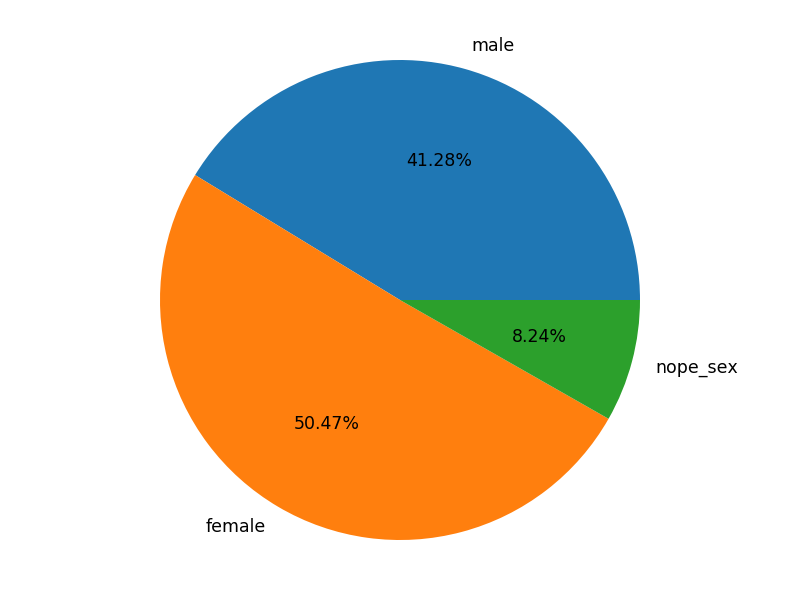

In [17]:
# draw pie chart
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
type_of_sex = ['male', 'female', 'nope_sex']
patient_sex = [male,female,nope_sex]
ax.pie(patient_sex, labels = type_of_sex, autopct='%1.2f%%')

ax.set_title("Num. of COVID 19 patients by gender in South Korea")
plt.show()

#### 사망자와 완치자

In [18]:
# 사망자와 완치자의 수
deceased = 0
released = 0
infected = 0

for i in range(len(raw_)):
    # status: 17
    state_of_patient = raw_[i][17]
    
    if(state_of_patient == 'deceased'):
        deceased = deceased + 1
    elif(state_of_patient == 'released'):
        released = released + 1
    else:
        infected = infected + 1
        
print("사망자 : " + str(deceased))
print("완치자 : " + str(released))
print("감염자 : " + str(infected))

사망자 : 74
완치자 : 2340
감염자 : 1590


<IPython.core.display.Javascript object>


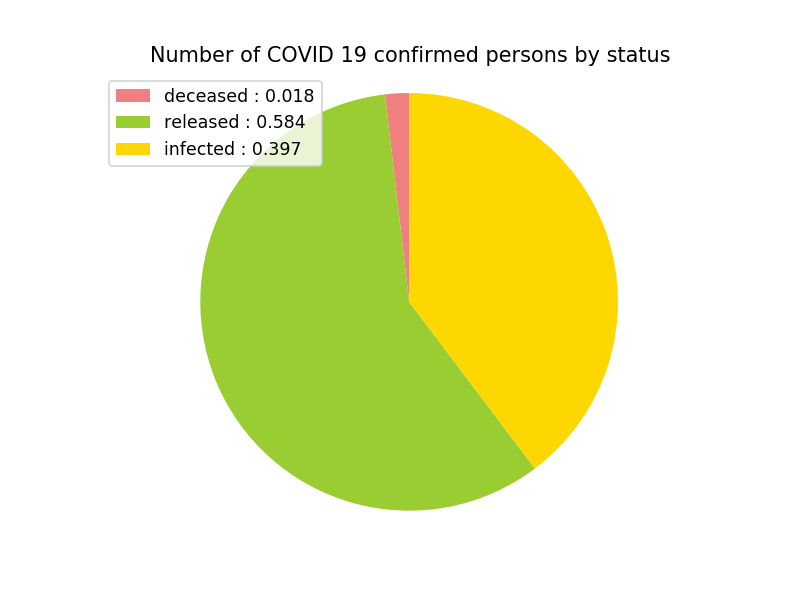

In [21]:
# The slices will be ordered and plotted counter-clockwise.
type_of_patient_status = ['deceased', 'released', 'infected']

num_of_patient_status = [deceased, released, infected]
sum_of_patient = deceased + released + infected
ratio_of_patient_status = []

for i in range(len(num_of_patient_status)):
    ratio_of_patient_status.append(num_of_patient_status[i] / sum_of_patient)

for i in range(len(ratio_of_patient_status)):
    type_of_patient_status[i] = type_of_patient_status[i] + " : {0:0.3f}".format(ratio_of_patient_status[i])

colors = ['lightcoral', 'yellowgreen', 'gold']

patches, texts = plt.pie(ratio_of_patient_status, colors=colors, startangle=90)

plt.legend(patches, type_of_patient_status, loc="best")
plt.axis('equal')
plt.title("Num. of COVID 19 patients by status in South Korea")
plt.show()

#### 나이대별 확진자 수

In [29]:
# 나이대별 확진자의 수

age000 = 0
age010 = 0
age020 = 0
age030 = 0
age040 = 0
age050 = 0
age060 = 0
age070 = 0
age080 = 0
age090 = 0
age100 = 0
unknown_age = 0

for i in range(len(raw_)):
    # birth_year: 3
    # age: 4
    age_data = raw_[i][3]
    if(age_data == '' or age_data == ' '):
        unknown_age = unknown_age + 1
    else:
        age_of_patient = 2020 - int(age_data)

        if(0 <= age_of_patient < 10):
            age000 = age000 + 1
        elif(10 <= age_of_patient < 20):
            age010 = age010 + 1
        elif(20 <= age_of_patient < 30):
            age020 = age020 + 1
        elif(30 <= age_of_patient < 40):
            age030 = age030 + 1
        elif(40 <= age_of_patient < 50):
            age040 = age040 + 1
        elif(50 <= age_of_patient < 60):
            age050 = age050 + 1
        elif(60 <= age_of_patient < 70):
            age060 = age060 + 1
        elif(70 <= age_of_patient < 80):
            age070 = age070 + 1
        elif(80 <= age_of_patient < 90):
            age080 = age080 + 1
        elif(90 <= age_of_patient < 100):
            age090 = age100 + 1
        else:
            age100 = age100 + 1
            
print("어린이 확진자 : " + str(age000))
print("10대 확진자 : " + str(age010))
print("20대 확진자 : " + str(age020))
print("30대 확진자 : " + str(age030))
print("40대 확진자 : " + str(age040))
print("50대 확진자 : " + str(age050))
print("60대 확진자 : " + str(age060))
print("70대 확진자 : " + str(age070))
print("80대 확진자 : " + str(age080))
print("90대 확진자 : " + str(age090))
print("100세 이상 확진자 : " + str(age100))
print("나이 미상 확진자 : " + str(unknown_age))

어린이 확진자 : 59
10대 확진자 : 166
20대 확진자 : 794
30대 확진자 : 434
40대 확진자 : 447
50대 확진자 : 599
60대 확진자 : 381
70대 확진자 : 196
80대 확진자 : 145
90대 확진자 : 3
100세 이상 확진자 : 2
나이 미상 확진자 : 738


<IPython.core.display.Javascript object>


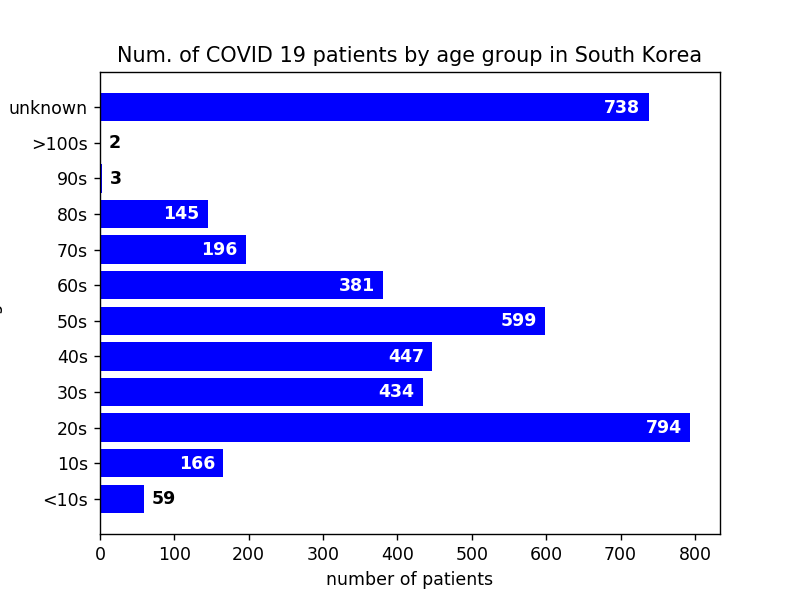

In [56]:
# draw bar chart
type_of_age = ['<10s', '10s', '20s', '30s', '40s', '50s', '60s', '70s', '80s', '90s', '>100s', 'unknown']
patient_age = [age000, age010, age020, age030, age040, age050, age060, age070, age080, age090, age100, unknown_age]

y_pos = [i for i, _ in enumerate(type_of_age)]

plt.barh(y_pos, patient_age, color='blue')
plt.ylabel("ages")
plt.xlabel("number of patients")
plt.title("Num. of COVID 19 patients by age group in South Korea")

plt.yticks(y_pos, type_of_age)

for i, v in enumerate(patient_age):
    x_axis_txt_mover = 60
    y_axis_txt_mover = .15
    txt_color = 'white'
    
    if(v < 100):
        x_axis_txt_mover = -10
        txt_color = 'black'
    
    plt.text(v - x_axis_txt_mover, i - y_axis_txt_mover, str(v), color=txt_color, fontweight='bold')

plt.show()

#### 감염 경로에 따른 분류

In [57]:
# 감염 경로에 대한 정보 획득
reasons = []

for i in range(len(raw_)):
    # infection_reason: 9
    reason = raw_[i][9] 
    
    if(reason == ''):
        pass
    else:        
        if reason in reasons:
            pass
        else:
            reasons.append(reason)
            
pprint.pprint(reasons)

['overseas inflow',
 'contact with patient',
 'Seongdong-gu APT',
 'etc',
 "Eunpyeong St. Mary's Hospital",
 'Shincheonji Church',
 'Dongan Church',
 'Guro-gu Call Center',
 'Itaewon Clubs',
 'Samsung Medical Center',
 'Coupang Logistics Center',
 'Guri Collective Infection',
 'KB Life Insurance',
 'Yeongdeungpo Learning Institute',
 'Onchun Church',
 'Cheongdo Daenam Hospital',
 'Suyeong-gu Kindergarten',
 'Ministry of Oceans and Fisheries',
 'gym facility in Cheonan',
 'gym facility in Sejong',
 'River of Grace Community Church',
 'Gyeongsan Seorin Nursing Home',
 'Gyeongsan Cham Joeun Community Center',
 'Gyeongsan Jeil Silver Town',
 'Bonghwa Pureun Nursing Home',
 'Pilgrimage to Israel',
 'Milal Shelter',
 'Geochang Church',
 'Changnyeong Coin Karaoke']


In [69]:
# 감염 원인별 확진자 수 확인
reasons_count = []

for i in range(len(reasons) + 1):
    reasons_count.append([])

for i in range(len(raw_)):   
    # infection_reason: 9
    reason = raw_[i][9] 
    
    for j in range(len(reasons)):
        if(reason == reasons[j]):
            reasons_count[j].append(1)

reasons_patient = []
    
for i in range(len(reasons)):
    reasons_count_sum = sum(reasons_count[i])
    reasons_patient.append([reasons[i], reasons_count_sum])

pprint.pprint(reasons_patient)

[['overseas inflow', 703],
 ['contact with patient', 1182],
 ['Seongdong-gu APT', 13],
 ['etc', 601],
 ["Eunpyeong St. Mary's Hospital", 16],
 ['Shincheonji Church', 107],
 ['Dongan Church', 17],
 ['Guro-gu Call Center', 112],
 ['Itaewon Clubs', 156],
 ['Samsung Medical Center', 7],
 ['Coupang Logistics Center', 70],
 ['Guri Collective Infection', 6],
 ['KB Life Insurance', 8],
 ['Yeongdeungpo Learning Institute', 2],
 ['Onchun Church', 33],
 ['Cheongdo Daenam Hospital', 21],
 ['Suyeong-gu Kindergarten', 3],
 ['Ministry of Oceans and Fisheries', 28],
 ['gym facility in Cheonan', 30],
 ['gym facility in Sejong', 4],
 ['River of Grace Community Church', 1],
 ['Gyeongsan Seorin Nursing Home', 15],
 ['Gyeongsan Cham Joeun Community Center', 10],
 ['Gyeongsan Jeil Silver Town', 12],
 ['Bonghwa Pureun Nursing Home', 31],
 ['Pilgrimage to Israel', 2],
 ['Milal Shelter', 11],
 ['Geochang Church', 6],
 ['Changnyeong Coin Karaoke', 4]]


<IPython.core.display.Javascript object>


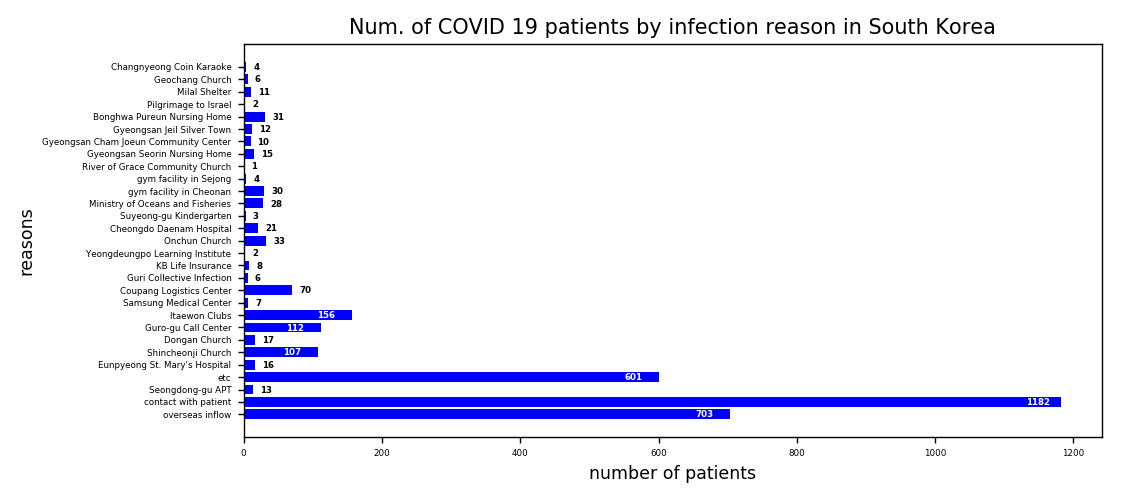

In [92]:
# draw bar chart
type_of_reason = []
num_of_patient_by_reason = []

for r, n in reasons_patient:
    type_of_reason.append(r)
    num_of_patient_by_reason.append(n)
    
y_pos = [i for i, _ in enumerate(type_of_reason)]

plt.figure(figsize=(9,4))
plt.barh(y_pos, num_of_patient_by_reason, color='blue')
plt.ylabel("reasons")
plt.xlabel("number of patients")
plt.title("Num. of COVID 19 patients by infection reason in South Korea")

plt.yticks(y_pos, type_of_reason, size = 5)
plt.xticks(size = 5)

plt.tight_layout()

for i, v in enumerate(num_of_patient_by_reason):
    x_axis_txt_mover = 50
    y_axis_txt_mover = .25
    txt_color = 'white'
    
    if(v < 100):
        x_axis_txt_mover = -10
        txt_color = 'black'
    
    plt.text(v - x_axis_txt_mover, i - y_axis_txt_mover, str(v), color=txt_color, fontweight='bold', size = 5)

plt.show()